In [9]:
import cv2
import matplotlib.pyplot as plt 

In [10]:
##base 64 to cv2 image
def get_cv2_image_from_base64_string(b64str):
    '''
    credit: https://stackoverflow.com/questions/33754935/read-a-base-64-encoded-image-from-memory-using-opencv-python-library
    :param uri:
    :return:
    '''
    encoded_data = b64str.split(',')[1]
    nparr = np.frombuffer(base64.b64decode(encoded_data), np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return img

In [11]:

def get_cropped_image(base64 = None,file_path = None):
    if file_path:
        img = cv2.imread(file_path)
    else:
        img = get_cv2_image_from_base64_string(base64) 
    
    #configuring pretrained model for cat detection 
    config = './ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
    frozen_model = './frozen_inference_graph.pb'
    model = cv2.dnn_DetectionModel(frozen_model,config)
    global classLabels 
    classLabels = []
    
    file_name = './pretrained_labels.txt'
    
    with open(file_name,'rt') as fpt:
        classLabels = fpt.read().rstrip('\n').split('\n')
        classLabels.append(fpt.read())
    
    
    model.setInputSize(320,320)
    model.setInputScale(1.0/127.5)
    model.setInputMean((127.5,127.5,127.5))
    model.setInputSwapRB(True)


    cropped_faces = []
    plt.imshow(img)


    #detecting any object present using pretrained model 
    ClassIndex , confidence , bbox = model.detect(img,confThreshold = 0.5)
    face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalcatface.xml')

    #box of object and cropping image if a cat face is present in it
    for x,y,w,h in bbox:
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        plt.imshow(roi_color)
        cropped_faces.append(roi_color)
        face = face_cascade.detectMultiScale(roi_gray)
        if face is not None:
            return cropped_faces



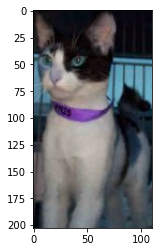

In [12]:
img = get_cropped_image(file_path = './Cat_dataset/test_img/Bobtail_J.jpg')

In [5]:
classLabels = []
file_name = './pretrained_labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    classLabels.append(fpt.read())
    

In [ ]:
classLabels = ['person','bicycle','car','motorbike','aeroplane',
'bus','train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [ ]:
img= cv2.imread('./Cat_dataset/test_img/Bobtail_J.jpg')
plt.imshow(img)

In [ ]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

In [ ]:
ClassIndex , confidence , bbox = model.detect(img,confThreshold = 0.5)

In [ ]:
print(ClassIndex)
classLabels[18]


In [ ]:
print(bbox)

In [ ]:
 flatten_index = ClassIndex.flatten()

In [ ]:
font_scale = 3 
font = cv2.FONT_HERSHEY_PLAIN
cropped_face = []
#for ClassInd,conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
#    cv2.rectangle(img,boxes,(255,0,0),2)
#    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
#    print(boxes.dtype)

    
for x,y,w,h in bbox:
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    cropped_face.append(roi_color)
    
plt.imshow(roi_color)
        

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [13]:
import keras 
import tensorflow as tf 
import numpy as np 

model = keras.models.load_model('./model.h5')

In [14]:
import cv2 
img = cv2.imread('./Cat_dataset/test_img/cacilo.jpg')

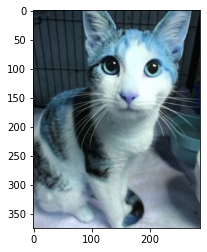

In [18]:
im_array = get_cropped_image(file_path = './Cat_dataset/test_img/cacilo.jpg')

In [22]:
im_array = np.array(im_array)
print(im_array.shape)
im_array.reshape(1,32,32,3)

(1, 375, 288, 3)


ValueError: cannot reshape array of size 324000 into shape (1,32,32,3)